In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from numpy.random import rand

import matplotlib.pyplot as plt

In [37]:
train_data=pd.read_csv("1646102559_507402_train35.txt", header=None)
test_data=pd.read_csv("1646102559_513849_test35-nolabels.txt", header=None)
test_data.head()

#replacing 5's with 1's and 3's with -1's
train_data[0] = train_data[0].replace(5,1)
train_data[0] = train_data[0].replace(3,-1)

train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,1,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
1,-1,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0
2,-1,-1.0,-1.0,-1.0,-0.830,0.442,1.000,1.000,0.479,-0.328,...,1.000,0.671,0.345,-0.507,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
3,-1,-1.0,-1.0,-1.0,-1.000,-1.000,-0.104,0.549,0.579,0.579,...,0.388,0.579,0.811,1.000,1.000,0.715,0.107,-0.526,-1.000,-1.0
4,-1,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.107,1.000,1.000,...,-0.280,0.322,0.813,1.000,1.000,0.633,-0.144,-0.994,-1.000,-1.0


In [72]:
# fives = train_data.loc[train_data[0] == 1]
# threes = train_data.loc[train_data[0] == 0]
 
# fives
# train_data.shape

(1214, 257)

In [39]:

X= train_data.drop([0], axis = 1)
y = train_data[0]


#X = train_data

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 20)
X_train.head()

,1,2,3,4,5,6,7,8,9,10,...,247,248,249,250,251,252,253,254,255,256
805,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-0.551,0.237,0.975,1.000,0.862,0.034,-0.989,-1.0,-1.0,-1.0
925,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0
390,-1.0,-0.883,-0.133,-0.272,-0.879,-1.000,-1.000,-1.000,-1.000,-1.000,...,-0.613,-0.613,-0.613,-0.829,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0
909,-1.0,-1.000,-1.000,-1.000,-1.000,-0.851,-0.242,0.164,0.569,1.000,...,0.407,0.310,-0.185,-0.688,-0.887,-1.000,-1.000,-1.0,-1.0,-1.0
269,-1.0,-1.000,-1.000,-0.713,0.016,0.644,1.000,0.960,0.502,-0.254,...,-0.045,-0.475,-0.837,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0


In [40]:
stump = {}
#Splitting rows based on the selected feature
def get_split(df, value, columnName):
    left, right = list(), list()
    for rowIndex, rowData in df.iterrows():
#         print(rowData)
        if rowData[1] < value:
            left.append(rowData)
        else:
            right.append(rowData)
            
    return left,right

#Calculate gini index for the given split
def calculate_gini(groups, classes):
    gini = 0.0
    inst = float(sum([len(group) for group in groups]))
    for group in groups:
        size = float(len(group))
        if size == 0:
            continue
        score = 0.0
        for class_value in classes:
            p_t = [row[0] for row in group].count(class_value) / size
            score += p_t ** 2
            
        gini += (1.0 - score) * (size/inst)
            
    return gini

#Finding the right split to choose
def fit_stump(X_train, y_train):
    global stump
    df = pd.DataFrame()
    df[0] = X_train[0]
    for (columnName, columnData) in X_train.drop([0], axis = 1).iteritems():
        #Initializing values
        best_column, best_value, best_score, best_group = float('inf'), float('inf'), float('inf'), None 

        #For finding the best stump, we check all the row values of the selected feature to fing the best value for splitting
        for rowIndex, rowData in X_train.iterrows():
            rowData.tolist()
            groups =  get_split(columnData.values, rowData[columnName], columnName)
            gini_index = calculate_gini(groups, y_train)
            if gini_index < best_score:
                best_column = columnName
                best_value = rowData[columnName]
                best_score = gini_index
                best_group = groups
        
#         df[1] = X_train[columnName]
    
#         col_max = X_train[columnName].max()
#         col_min = X_train[columnName].min()
#         r = col_max - col_min
#         step = r/5
# #         print(columnName)
#         splits = np.arange(col_min, col_max, step)
            
#         for value in splits:
#             groups =  get_split(df, value, columnName)
#             gini_index = calculate_gini(groups, y_train)
#             if gini_index < best_score:
#                 best_column = columnName
#                 best_value = value
#                 best_score = gini_index
#                 best_group = groups
    stump = {'column' : best_column, 'value' : best_value, 'groups' : best_group}
    return stump

def stump_predict(stump, X):
	if X[stump['column']] < stump['value']:
		if isinstance(stump['groups'][0], dict):
			return predict(stump['groups'][0], X)
		else:
			return stump['groups'][0]
	else:
		if isinstance(stump['groups'][1], dict):
			return predict(stump['groups'][1], X)
		else:
			return stump['groups'][1]           

    

In [41]:
# stump = fit_stump(X_train, y_train)
# find_split(X_train, y_train)


In [42]:
def get_error(y, y_pred, wt):
    return (sum(wt * (np.not_equal(y, y_pred)).astype(int)))/sum(wt)

def get_alpha(error):
    return np.log((1 - error) / error)

def update_weights(wt, alpha, y, y_pred):
    return wt * np.exp(alpha * (np.not_equal(y, y_pred)).astype(int))

In [46]:
from sklearn.tree import DecisionTreeClassifier

alpha = []

G_M = []
# feature_count = None

train_errors = []
# prediction_errors = []

def fit(X, y, feature_count = 200):
    global alpha
    global train_errors
    alpha = []
    train_errors = []
#     feature_count = M
    feature_count = feature_count
    for m in range(0, feature_count):
            
        if m == 0:
            wt = np.ones(len(y)) * 1 / len(y) 
        else:

            wt = update_weights(wt, classifier_alpha, y, y_pred)
            
        G_m = DecisionTreeClassifier(max_depth = 1) 
        G_m.fit(X, y, sample_weight = wt)
        y_pred = G_m.predict(X)
            
        G_M.append(G_m) 

        class_error = get_error(y, y_pred, wt)
        train_errors.append(class_error)

        classifier_alpha = get_alpha(class_error)
        alpha.append(classifier_alpha)

#     assert len(self.G_M) == len(self.alphas)
def predict(X, feature_count):

    weak_preds = pd.DataFrame(index = range(len(X)), columns = range(feature_count)) 

    for m in range(feature_count):
        y_pred_m = G_M[m].predict(X) * alpha[m]
        weak_preds.iloc[:,m] = y_pred_m

    y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

    return y_pred

In [47]:
# ab = AdaBoost()
feature_count = 200
fit(X_train, y_train, feature_count)

y_pred = predict(X_test, feature_count)
print(y_pred)

0     -1
1     -1
2     -1
3      1
4      1
      ..
238    1
239   -1
240    1
241   -1
242   -1
Length: 243, dtype: int64


In [55]:
training_error = train_errors[-1]

print('The training error for this classification model is:', training_error)

The training error for this classification model is: 0.36782074160396677


In [79]:
test_errors = []
y_test_pred=predict(test_data,feature_count = 50)  
testing_error = 0
m,n=X_test.shape
print(m,n)
print("Test_model",type(y_test))
for i in range(m):
    out = y_test_pred.iloc[i] - y_test.iloc[i] 
    out = out*out 
    testing_error+=out


testing_error = testing_error/m
print('The testing error for this classification model is:', testing_error)

test_errors.append(testing_error)
print(test_errors)

243 256
Test_model <class 'pandas.core.series.Series'>
The testing error for this classification model is: 1.9094650205761317
[1.9094650205761317]


In [80]:
y_test_pred=predict(test_data,feature_count = 75)  

testing_error = 0
m,n=X_test.shape
print(m,n)
print("Test_model",type(y_test))
for i in range(m):
    out = y_test_pred.iloc[i] - y_test.iloc[i] 
    out = out*out 
    testing_error+=out


testing_error = testing_error/m
print('The testing error for this classification model is:', testing_error)

test_errors.append(testing_error)
print(test_errors)

243 256
Test_model <class 'pandas.core.series.Series'>
The testing error for this classification model is: 1.9094650205761317
[1.9094650205761317, 1.9094650205761317]


In [81]:
y_test_pred=predict(test_data,feature_count = 100)  

testing_error = 0
m,n=X_test.shape
print(m,n)
print("Test_model",type(y_test))
for i in range(m):
    out = y_test_pred.iloc[i] - y_test.iloc[i] 
    out = out*out 
    testing_error+=out


testing_error = testing_error/m
print('The testing error for this classification model is:', testing_error)

test_errors.append(testing_error)
print(test_errors)

243 256
Test_model <class 'pandas.core.series.Series'>
The testing error for this classification model is: 1.9259259259259258
[1.9094650205761317, 1.9094650205761317, 1.9259259259259258]


In [82]:
y_test_pred=predict(test_data,feature_count = 125)  

testing_error = 0
m,n=X_test.shape
print(m,n)
print("Test_model",type(y_test))
for i in range(m):
    out = y_test_pred.iloc[i] - y_test.iloc[i] 
    out = out*out 
    testing_error+=out


testing_error = testing_error/m
print('The testing error for this classification model is:', testing_error)

test_errors.append(testing_error)
print(test_errors)

243 256
Test_model <class 'pandas.core.series.Series'>
The testing error for this classification model is: 1.9094650205761317
[1.9094650205761317, 1.9094650205761317, 1.9259259259259258, 1.9094650205761317]


In [83]:
y_test_pred=predict(test_data,feature_count = 150)  

testing_error = 0
m,n=X_test.shape
print(m,n)
print("Test_model",type(y_test))
for i in range(m):
    out = y_test_pred.iloc[i] - y_test.iloc[i] 
    out = out*out 
    testing_error+=out


testing_error = testing_error/m
print('The testing error for this classification model is:', testing_error)

test_errors.append(testing_error)
print(test_errors)

243 256
Test_model <class 'pandas.core.series.Series'>
The testing error for this classification model is: 1.8930041152263375
[1.9094650205761317, 1.9094650205761317, 1.9259259259259258, 1.9094650205761317, 1.8930041152263375]


In [84]:
y_test_pred=predict(test_data,feature_count = 175)  

testing_error = 0
m,n=X_test.shape
print(m,n)
print("Test_model",type(y_test))
for i in range(m):
    out = y_test_pred.iloc[i] - y_test.iloc[i] 
    out = out*out 
    testing_error+=out


testing_error = testing_error/m
print('The testing error for this classification model is:', testing_error)

test_errors.append(testing_error)
print(test_errors)

243 256
Test_model <class 'pandas.core.series.Series'>
The testing error for this classification model is: 1.8930041152263375
[1.9094650205761317, 1.9094650205761317, 1.9259259259259258, 1.9094650205761317, 1.8930041152263375, 1.8930041152263375]


In [85]:
y_test_pred=predict(test_data,feature_count = 200)  

testing_error = 0
m,n=X_test.shape
print(m,n)
print("Test_model",type(y_test))
for i in range(m):
    out = y_test_pred.iloc[i] - y_test.iloc[i] 
    out = out*out 
    testing_error+=out


testing_error = testing_error/m
print('The testing error for this classification model is:', testing_error)

test_errors.append(testing_error)

print(test_errors)

243 256
Test_model <class 'pandas.core.series.Series'>
The testing error for this classification model is: 1.9094650205761317
[1.9094650205761317, 1.9094650205761317, 1.9259259259259258, 1.9094650205761317, 1.8930041152263375, 1.8930041152263375, 1.9094650205761317]


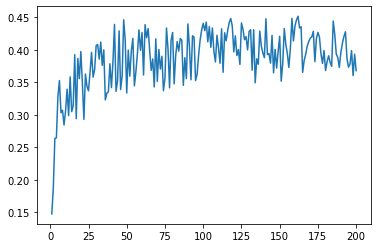

In [69]:
plt.plot(range(1,201),train_errors, label = "Training error", linestyle = "-")


In [28]:
# print(stump['value'])

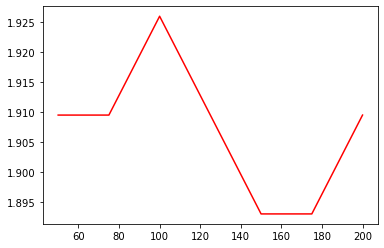

In [86]:
plt.plot((50,75,100,125,150,175,200),test_errors, label = "Test error", linestyle = "solid", color = "red")

In [29]:
# col_max = X_train[256].max()
# col_min = X_train[256].min()
# r = col_max - col_min
# #         splits = []
# #         split = col_min
# step = r/5
        
# # df[1] = X_train[columnName]
# # print(columnName)
# splits = np.arange(col_min, col_max, step)
# print(splits[1])

In [ ]:
y_test_pred=ab.predict(test_data)

In [ ]:
testFile=open('output.txt','w')
for element in y_test_pred:
        if element == -1:
            testFile.write('3')
        else:
            testFile.write('5')
        testFile.write('\n')
testFile.close()